In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

# Chapter 4. Representing Data and Engineering Features

So far, we’ve assumed that our data comes in as a two-dimensional array of floating-point numbers, where each column is a [continuous feature](https://www.mathsisfun.com/data/data-discrete-continuous.html) that describes the data points.  
For many applications, this is not how the data is collected.  
A particularly common type of feature is the [categorical features](http://www.dummies.com/education/math/statistics/types-of-statistical-data-numerical-categorical-and-ordinal/).  
Also known as [discrete features](https://www.mathsisfun.com/data/data-discrete-continuous.html), these are usually not numeric.  
The distinction between categorical features and continuous features is analogous to the distinction between classification and regression, only on the input side rather than the output side.  
Examples of continuous features that we have seen are pixel brightnesses and size measurements of plant flowers.  
Examples of categorical features are the brand of a product, the color of a product, or the department (books, clothing, hardware) it is sold in.  
These are all properties that can describe a product, but they don’t vary in a continuous way.  
A product belongs either in the clothing department or in the books department.  
There is no middle ground between books and clothing, and no natural order for the different categories (books is not greater or less than clothing, hardware is not between books and clothing, etc.).

Regardless of the types of features your data consists of, how you represent them can have an enormous effect on the performance of machine learning models.  
We saw in Chapters 2 and 3 that scaling of the data is important.  
In other words, if you don’t rescale your data (say, to unit variance), then it makes a difference whether you represent a measurement in centimeters or inches.  
We also saw in Chapter 2 that it can be helpful to *augment* your data with additional features, like adding interactions (products) of features or more general polynomials.

The question of how to represent your data best for a particular application is known as feature engineering, and it is one of the main tasks of data scientists and machine learning practitioners trying to solve real-world problems.  
Representing your data in the right way can have a bigger influence on the performance of a supervised model than the exact parameters you choose.  
In this chapter, we will first go over the important and very common case of categorical features, and then give some examples of helpful transformations for specific combinations of features and models.

## Categorical Variables

As an example, we will use the dataset of adult incomes in the United States, derived from the 1994 census database.  
The task of the adult dataset is to predict whether a worker has an income of over \$50,000 or under \$50,000.  
The features in this dataset include the workers’ ages, how they are employed (self employed, private industry employee, government employee, etc.), their education, their gender, their working hours per week, occupation, and more.  
Table 4-1 shows the first few entries in the dataset:

![title](images/adult_incomes_data.png)

The task is phrased as a classification task with the two classes being income `<=50k` and `>50k`.  
It would also be possible to predict the exact income, and make this a regression task.  
However, that would be much more difficult, and the 50K division is interesting to understand on its own.  
In this dataset, `age` and `hours-per-week` are continuous features, which we know how to treat.  
The `workclass`, `education`, `sex`, and `occupation` features are categorical, however.  
All of them come from a fixed list of possible values, as opposed to a range, and denote a qualitative property, as opposed to a quantity.  
As a starting point, let’s say we want to learn a logistic regression classifier on this data.  
We know from Chapter 2 that a logistic regression makes predictions, $ŷ$, using the following formula:

$ŷ = w[0] * x[0] +w[1] * x[1] + \ldots + w[p] * x[p] + b > 0$

where $w[i]$ and $b$ are coefficients learned from the training set and $x[i]$ are the input features.  
This formula makes sense when $x[i]$ are numbers, but not when $x[2]$ is `"Masters"` or `"Bachelors"`.  
Clearly we need to represent our data in some different way when applying logistic regression.  
The next section will explain how we can overcome this problem.

### One-Hot-Encoding (Dummy Variables)

By far the most common way to represent categorical variables is using the [one-hot-encoding](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science) or *one-out-of-N encoding*, also known as [dummy variables](https://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29).  
The idea behind dummy variables is to replace a categorical variable with one or more new features that can have the values 0 and 1.  
The values 0 and 1 make sense in the formula for linear binary classification (and for all other models in `scikit-learn`), and we can represent any number of categories by introducing one new feature per category, as described here.  
Let’s say for the workclass feature we have possible values of `"Government Employee"`, `"Private Employee"`, `"Self Employed"`, and `"Self Employed Incorporated"`.  
To encode these four possible values, we create four new features, called `"Government Employee"`, `"Private Employee"`, `"Self Employed"`, and `"Self Employed Incorporated"`.  
A feature is 1 if `workclass` for this person has the corresponding value and 0 otherwise, so exactly one of the four new features will be 1 for each data point.  
This is why this is called *one-hot* or *one-out-of-N* encoding.

The principle is illustrated in Table 4-2.  
A single feature is encoded using four new features.  
When using this data in a machine learning algorithm, we would drop the original `workclass` feature and only keep the 0-1 features.

![title](images/Table_4-2.png)

**NOTE**  
The one-hot encoding we use is quite similar, but not identical, to the dummy coding used in statistics.  
For simplicity, we encode each category with a different binary feature.  
In statistics, it is common to encode a categorical feature with k different possible values into k–1 features (the last one is represented as all zeros).  
This is done to simplify the analysis (more technically, this will avoid making the data matrix rank-deficient.

There are two ways to convert your data to a one-hot encoding of categorical variables, using either [pandas](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) or [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).  
At the time of writing, using pandas is slightly easier, so let’s go this route.  
First we load the data using pandas from a comma-separated values (CSV) file:

In [74]:
import os
# The file has no headers naking the columns, so we pass 
# header=None and provide the column names explicitly in "names".
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
print(adult_path)

/Users/benjamingrove/.pyenv/versions/3.6.1/lib/python3.6/site-packages/mglearn/data/adult.data


In [75]:
data = pd.read_csv(adult_path, header=None, index_col=False,
       names=['age', 'workclass', 'fnlwgt', 'education',
              'education-num', 'marital-status', 'occupation',
              'relationship', 'race', 'gender', 'capital-gain',
              'capital-loss', 'hours-per-week', 'native-country',
              'income'])
# For illustrative purposes, we'll only select some of the columns:
data = data[['age', 'workclass', 'education', 'gender',
             'hours-per-week', 'occupation', 'income']]
# IPython.display allows nice output formatting within the 
# Jupyter notebook:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#### Checking string-encoded categorical data

After reading a dataset like this, it is often good to first check if a column actually contains meaningful categorical data.  
When working with data that was input by humans (say, users on a website), there might not be a fixed set of categories, and differences in spelling and capitalization might require preprocessing.  
For example, it might be that some people specified gender as “male” and some as “man,” and we might want to represent these two inputs using the same category.  
A good way to check the contents of a column is using the `value_counts` method of a `pandas` `Series` (the type of a single column in a `DataFrame`), to show us what the unique values are and how often they appear:

In [76]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


We can see that there are exactly two values for gender in this dataset, `Male` and `Female`, meaning the data is already in a good format to be represented using one-hot-encoding.  
In a real application, you should look at all columns and check their values.  
We will skip this here for brevity’s sake.  
There is a very simple way to encode the data in pandas, using the `get_dummies()` function.  
The [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) function automatically transforms all columns that have object type (like strings) or are categorical (which is a special `pandas` concept that we haven’t talked about yet):

In [77]:
print("Original Features: \n", list(data.columns))

Original Features: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']


In [78]:
data_dummies = pd.get_dummies(data)
print("Features After Applying get_dummies(): \n",
      list(data_dummies.columns))

Features After Applying get_dummies(): 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty'

You can see that the continuous features `age` and `hours-per-week` were not touched, while the categorical features were expanded into one new feature for each possible value:

In [79]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


We can now use the values attribute to convert the `data_dummies` `DataFrame` into a `NumPy` array, and then train a machine learning model on it.  
Be careful to separate the target variable (which is now encoded in two income columns) from the data before training a model.  
Including the output variable, or some derived property of the output variable, into the feature representation is a very common mistake in building supervised machine learning models.

**WARNING**  
Be careful: column indexing in pandas includes the end of the range, so `'age'`:`'occupation_ Transport-moving'` is inclusive of `occupation_` `Transport-moving`.  
This is different from slicing a NumPy array, where the end of a range is not included: for example, `np.arange(11)[0:10]` doesn’t include the entry with index 10.

In this case, we extract only the columns containing features -- that is, all columns from `age` to `occupation_ Transport-moving`.  
This range contains all of the features but not the target:

In [80]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays:
X = features.values
print("X[:5]: \n", X[:5], "\n")
y = data_dummies['income_ >50K'].values
print("y[:5]: \n", y[:5], "\n")
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X[:5]: 
 [[39 40  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [50 13  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [38 40  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [53 40  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [28 40  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]] 

y[:5]: 
 [0 0 0 0 0] 

X.shape: (32561, 44)  y.shape: (32561,)


Now the data is represented in a way that `scikit-learn` can work with, and we can proceed as usual:

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test Score: {:.2f}".format(logreg.score(X_test, y_test)))

Test Score: 0.81


**WARNING**  
In this example, we called `get_dummies()` on a `DataFrame` containing both the training and the test data.  
This is important to ensure categorical values are represented in the same way in the training set and the test set.  
Imagine we have the training and test sets in two different `DataFrames`.  
If the `"Private Employee"` value for the `workclass` feature does not appear in the test set, `pandas` will assume there are only three possible values for this feature and will create only three new dummy features.  
Now our training and test sets have different numbers of features, and we can’t apply the model we learned on the training set to the test set anymore.  
Even worse, imagine the workclass feature has the values `"Government Employee"` and `"Private Employee"` in the training set, and `"Self Employed"` and `"Self Employed Incorporated"` in the test set.  
In both cases, `pandas` will create two new dummy features, so the encoded `DataFrames` will have the same number of features.  
However, the two dummy features have entirely different meanings in the training and test sets.  
The column that means `"Government Employee"` for the training set would encode `"Self Employed"` for the test set.  
If we built a machine learning model on this data it would work very badly, because it would assume the columns mean the same things (because they are in the same position) when in fact they mean very different things.  
To fix this, either call `get_dummies()` on a DataFrame that contains both the training and the test data points, or make sure that the column names are the same for the training and test sets after calling `get_dummies()`, to ensure they have the same semantics.

### Numbers Can Encode Categoricals

In the example of the adult dataset, the categorical variables were encoded as strings.  
On the one hand, that opens up the possibility of spelling errors, but on the other hand, it clearly marks a variable as categorical.  
Often, whether for ease of storage or because of the way the data is collected, categorical variables are encoded as integers.  
For example, imagine the census data in the adult dataset was collected using a questionnaire, and the answers for `workclass` were recorded as 0 (first box ticked), 1 (second box ticked), 2 (third box ticked), and so on.  
Now the column will contain numbers from 0 to 8, instead of strings like `"Private"`, and it won’t be immediately obvious to someone looking at the table representing the dataset whether they should treat this variable as continuous or categorical.  
Knowing that the numbers indicate employment status, however, it is clear that these are very distinct states and should not be modeled by a single continuous variable.

**WARNING**  
Categorical features are often encoded using integers.  
That they are numbers doesn’t mean that they should necessarily be treated as continuous features.  
It is not always clear whether an integer feature should be treated as continuous or discrete (and one-hot-encoded).  
If there is no ordering between the semantics that are encoded (like in the `workclass` example), the feature must be treated as discrete.  
For other cases, like five-star ratings, the better encoding depends on the particular task and data and which machine learning algorithm is used.

The `get_dummies()` function in `pandas` treats all numbers as continuous and will not create dummy variables for them.  
To get around this, you can either use `scikit-learn`’s [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), for which you can specify which variables are continuous and which are discrete, or convert numeric columns in the `DataFrame` to strings.  
To illustrate, let’s create a `DataFrame` object with two columns, one containing strings and one containing integers:

In [82]:
# Create a DataFrame with an integer feature and a categorical
# string feature:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks',
                                                'fox',
                                                'socks',
                                                'box']})
display(demo_df)

,Categorical Feature,Integer Feature
0,socks,0
1,fox,1
2,socks,2
3,box,1


Using `get_dummies()` will only encode the string feature and will not change the integer feature, as you can see in Table 4-5:

In [83]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


If you want dummy variables to be created for the `"Integer Feature"` column, you can explicitly list the columns you want to encode using the `columns` parameter.  
Then, both features will be treated as categorical (see Table 4-6):

In [84]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df,
                       columns=['Integer Feature',
                                'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## Binning, Discretization, Linear Models, and Trees

The best way to represent data depends not only on the semantics of the data, but also on the kind of model you are using.  
Linear models and tree-based models (such as decision trees, gradient boosted trees, and random forests), two large and very commonly used families, have very different properties when it comes to how they work with different feature representations.  
Let’s go back to the wave regression dataset that we used in Chapter 2.  
It has only a single input feature.  
Here is a comparison of a linear regression model and a decision tree regressor on this dataset (see Figure 4-1):

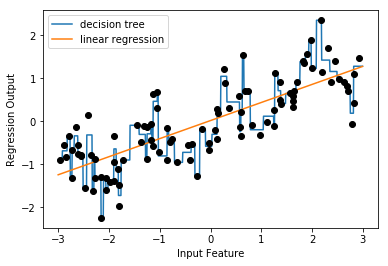

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

As you know, linear models can only model linear relationships, which are lines in the case of a single feature.  
The decision tree can build a much more complex model of the data.  
However, this is strongly dependent on the representation of the data.  
One way to make linear models more powerful on continuous data is to use [binning (also known as discretization)](https://en.wikipedia.org/wiki/Discretization) of the feature to split it up into multiple features, as described here.

We imagine a partition of the input range for the feature (in this case, the numbers from –3 to 3) into a fixed number of *bins* -- say, 10.  
A data point will then be represented by which bin it falls into.  
To determine this, we first have to define the bins.  
In this case, we’ll define 10 bins equally spaced between –3 and 3.  
We use the np.linspace function for this, creating 11 entries, which will create 10 bins -- they are the spaces in between two consecutive boundaries:

In [86]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


Here, the first bin contains all data points with feature values –3 to –2.4, the second bin contains all points with feature values from –2.4 to –1.8, and so on.  
Next, we record for each data point which bin it falls into.  
This can be easily computed using the `np.digitize()` function:

In [87]:
which_bin = np.digitize(X, bins=bins)
print("\nData Points:\n", X[:5])
print("\nBin Membership for Data Points:\n", which_bin[:5])


Data Points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin Membership for Data Points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


What we did here is transform the single continuous input feature in the wave dataset into a categorical feature that encodes which bin a data point is in.  
To use a `scikit-learn` model on this data, we transform this discrete feature to a one-hot encoding using the `OneHotEncoder` from the preprocessing module.  
The `OneHotEncoder` does the same encoding as `pandas.get_dummies()`, though it currently only works on categorical variables that are integers:

In [88]:
from sklearn.preprocessing import OneHotEncoder

# Transform data using the OneHotEncoder:
encoder = OneHotEncoder(sparse=False)
# Use encoder.fit to find the unique values that appear
# in which_bin:
encoder.fit(which_bin)
# Transform creates the one-hot encoding:
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


Because we specified 10 bins, the transformed dataset `X_binned` now is made up of 10 features:

In [89]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Now we can build a new linear regression model and a new decision tree model on the one-hot-encoded data.  
The result is visualized in Figure 4-2, together with the bin boundaries, shown as dotted black lines:

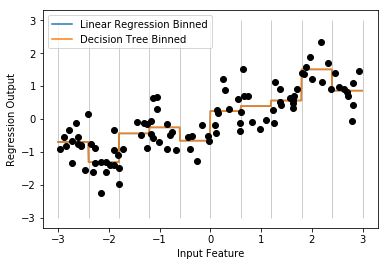

In [90]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned),
         label="Linear Regression Binned")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned),
         label="Decision Tree Binned")

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")

The dashed line and solid line are exactly on top of each other, meaning the linear regression model and the decision tree make exactly the same predictions.  
For each bin, they predict a constant value.  
As features are constant within each bin, any model must predict the same value for all points within a bin.  
Comparing what the models learned before binning the features and after, we see that the linear model became much more flexible, because it now has a different value for each bin, while the decision tree model got much less flexible.

Binning features generally has no beneficial effect for tree-based models, as these models can learn to split up the data anywhere.  
In a sense, that means decision trees can learn whatever binning is most useful for predicting on this data.  
Additionally, decision trees look at multiple features at once, while binning is usually done on a per-feature basis.  
However, the linear model benefited greatly in expressiveness from the transformation of the data.  
If there are good reasons to use a linear model for a particular dataset -- say, because it is very large and high-dimensional, but some features have nonlinear relations with the output -- binning can be a great way to increase modeling power.

## Interactions and Polynomials

Another way to enrich a feature representation, particularly for linear models, is adding interaction features and polynomial features of the original data.  
This kind of feature engineering is often used in statistical modeling, but it’s also common in many practical machine learning applications.

As a first example, look again at Figure 4-2.  
The linear model learned a constant value for each bin in the wave dataset.  
We know, however, that linear models can learn not only offsets, but also slopes.  
One way to add a slope to the linear model on the binned data is to add the original feature (the x-axis in the plot) back in.  
This leads to an 11-dimensional dataset, as seen in Figure 4-3:

In [91]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


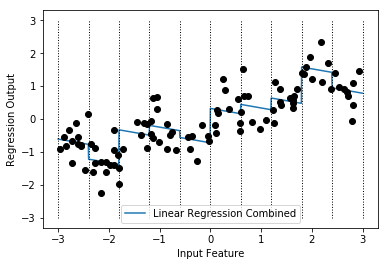

In [92]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined),
         label="Linear Regression Combined")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best")
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.plot(X[:, 0], y, 'o', c='k')

In this example, the model learned an offset for each bin, together with a slope.  
The learned slope is downward, and shared across all the bins --there is a single x-axis feature, which has a single slope.  
Because the slope is shared across all bins, it doesn’t seem to be very helpful.  
We would rather have a separate slope for each bin!  
We can achieve this by adding an interaction or product feature that indicates which bin a data point is in and where it lies on the x-axis.  
This feature is a product of the bin indicator and the original feature.  
Let’s create this dataset:

In [93]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


The dataset now has 20 features: the indicators for which bin a data point is in, and a product of the original feature and the bin indicator.  
You can think of the product feature as a separate copy of the x-axis feature for each bin.  
It is the original feature within the bin, and zero everywhere else.  
Figure 4-4 shows the result of the linear model on this new representation:

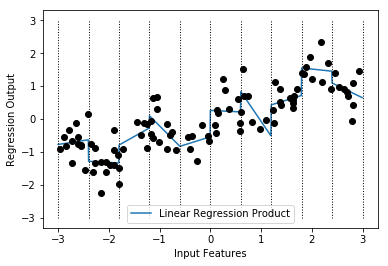

In [94]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product),
         label="Linear Regression Product")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend()

As you can see, now each bin has its own offset and slope in this model.  
Using binning is one way to expand a continuous feature.  
Another one is to use [polynomials](https://en.wikipedia.org/wiki/Polynomial) of the original features.  
For a given feature `x`, we might want to consider `x ** 2`, `x ** 3`, `x ** 4`, and so on.  
This is implemented in PolynomialFeatures in the preprocessing module:

In [95]:
from sklearn.preprocessing import PolynomialFeatures
# Include polynomials up to x ** 10.
# The default "include_bias=True" adds a feature that's
# constantly 1.
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

Using a degree of 10 yields 10 features:

In [96]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


Let's compare the entries of X_poly to those of X:

In [97]:
print("Entries of X: \n{}".format(X[:5]))

Entries of X: 
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]


In [98]:
print("Entries of X_poly: \n{}".format(X_poly[:5]))

Entries of X_poly: 
[[ -7.52759287e-01   5.66646544e-01  -4.26548448e-01   3.21088306e-01
   -2.41702204e-01   1.81943579e-01  -1.36959719e-01   1.03097700e-01
   -7.76077513e-02   5.84199555e-02]
 [  2.70428584e+00   7.31316190e+00   1.97768801e+01   5.34823369e+01
    1.44631526e+02   3.91124988e+02   1.05771377e+03   2.86036036e+03
    7.73523202e+03   2.09182784e+04]
 [  1.39196365e+00   1.93756281e+00   2.69701700e+00   3.75414962e+00
    5.22563982e+00   7.27390068e+00   1.01250053e+01   1.40936394e+01
    1.96178338e+01   2.73073115e+01]
 [  5.91950905e-01   3.50405874e-01   2.07423074e-01   1.22784277e-01
    7.26822637e-02   4.30243318e-02   2.54682921e-02   1.50759786e-02
    8.92423917e-03   5.28271146e-03]
 [ -2.06388816e+00   4.25963433e+00  -8.79140884e+00   1.81444846e+01
   -3.74481869e+01   7.72888694e+01  -1.59515582e+02   3.29222321e+02
   -6.79478050e+02   1.40236670e+03]]


You can obtain the semantics of the features by calling the `get_feature_names()` method, which provides the exponent for each feature:

In [99]:
print("Polynomial feature names: \n{}".format(
      poly.get_feature_names()))

Polynomial feature names: 
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


You can see that the first column of `X_poly` corresponds exactly to `X`, while the other columns are the powers of the first entry.  
It’s interesting to see how large some of the values can get.  
The second row has entries above 20,000, orders of magnitude different from the rest.  
Using polynomial features together with a linear regression model yields the classical model of [polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression) (see Figure 4-5):

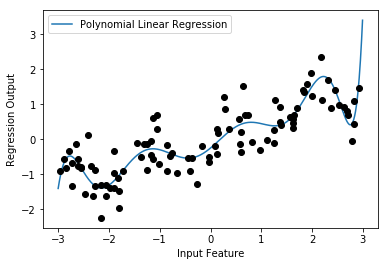

In [100]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly),
         label="Polynomial Linear Regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend()

As you can see, polynomial features yield a very smooth fit on this one-dimensional data.  
However, polynomials of high degree tend to behave in extreme ways on the boundaries or in regions with little data.  
As a comparison, here is a kernel SVM model learned on the original data, without any transformation (see Figure 4-6):

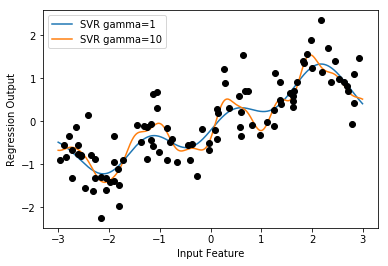

In [101]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line),
             label="SVR gamma={}".format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend()

Using a more complex model, a kernel SVM, we are able to learn a similarly complex prediction to the polynomial regression without an explicit transformation of the features.

As a more realistic application of interactions and polynomials, let’s look again at the Boston Housing dataset.  
We already used polynomial features on this dataset in Chapter 2.  
Now let’s have a look at how these features were constructed, and at how much the polynomial features help.  
First we load the data, and rescale it to between 0 and 1 using `MinMaxScaler`:

In [102]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)
# Rescale the data:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now we extract polynomial features and interactions up to a degree of 2:

In [103]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


The data originally had 13 features, which were expanded into 105 interaction features.  
These new features represent all possible interactions between two different original features, as well as the square of each original feature.  
`degree=2` here means that we look at all features that are the product of up to two original features.  
The exact correspondence between input and output features can be found using the `get_feature_names()` method:

In [104]:
print("Polynomial Feature Names: \n{}".format(
    poly.get_feature_names()))

Polynomial Feature Names: 
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


The first new feature is a constant feature, called `"1"` here. The next 13 features are the original features (called `"x0"` to `"x12"`).  
Then follows the first feature squared (`"x0^2"`) and combinations of the first and the other features.

Let’s compare the performance using `Ridge` on the data with and without interactions:

In [105]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


Clearly, the interactions and polynomial features gave us a good boost inperformance when using `Ridge`.  
When using a more complex model like a random forest, the story is a bit different:

In [106]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(
    X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(
    X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    rf.score(X_test_poly, y_test)))

Score without interactions: 0.801
Score with interactions: 0.758


You can see that even without additional features, the random forest beats the performance of `Ridge`.  
Adding interactions and polynomials actually decreases performance slightly.

## Univariate Nonlinear Transformations